In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# to do:
## make everything into functions
## copy + paste into streamlit file
## crop/handle species

In [3]:
list_of_DFs = []
in_dir = "./in/"
for filename in os.listdir(in_dir):
    # read data into dataframe
    df = pd.read_csv(in_dir+filename, sep = '\t')
    # select only the two important columns
    part_of_df = df[["kingdom; phylum; class; order; family; genus; species","abundance"]].copy()
    # drop null values
    part_of_df.dropna(inplace=True)
    # append to the list
    list_of_DFs.append(part_of_df)

    
# trying to simulate that a user has picked some names for the datasets
names = ["hovno", "prdel"]
    
# create the same structure as in the real version:
names_and_dfs = []
for df, name in zip(list_of_DFs, names):
    #rename the abundance column to a corresponding name
    df.rename(columns={"abundance":name}, inplace=True)
    
    names_and_dfs.append((df, name))

In [4]:
#preprocess DFs:
    ### dropna
first_df, first_name = names_and_dfs[0]

first_df_grouped = first_df.groupby(by = "kingdom; phylum; class; order; family; genus; species").sum()

for index, name_and_DF in enumerate(names_and_dfs):
    df, name = name_and_DF
    if index == 0:
        pass
    else:
        # group:
        df = df.groupby(by = "kingdom; phylum; class; order; family; genus; species").sum()
        
        # left join to the first df:
        first_df_grouped = first_df_grouped.merge(df, on="kingdom; phylum; class; order; family; genus; species", how = 'left')
        
        
# FINAL touches:        
# ------------------------- #
merged_df = first_df_grouped
# sort values by the first sample:
merged_df.sort_values(by=first_name, ascending = False, inplace=True)

# crop for the top 25
final_df = merged_df[names][:25]

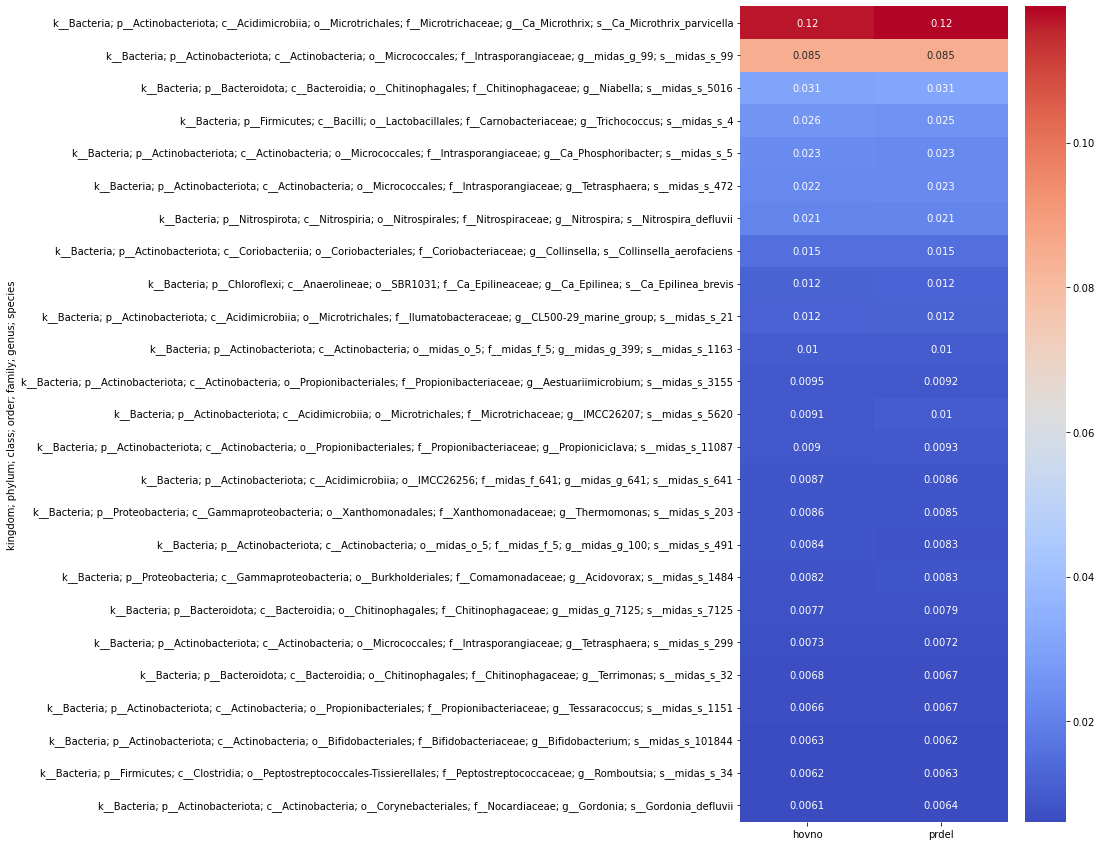

In [5]:
plt.figure(figsize=(6,15))
sns.heatmap(data = final_df, cmap = "coolwarm", annot = True)
plt.show()